# 作業六
## 題目一 (50%)

這是一個整理自國小國文教科書資料集的dataframe，顯示「把」字的不同詞義在國小國文教科書中的使用情況（詞義資訊來自[中文詞彙網路CWN 2.0](https://lopentu.github.io/CwnWeb/)）。這個dataframe的直欄包括：

  - Lemma: 詞條（也就是「把」）
  - Part-of-Speech: 詞類
  - Sense_id: 詞義編號
  - Gloss: 詞義解釋
  - Confidence: 信賴度
  - Grade: 年級

In [1]:
import pandas as pd
import csv

In [2]:
# 1. 資料讀取
ba_df=pd.read_csv('./ba_df.csv', encoding='utf-8')
ba_df.head(10)

,Lemma,Part-of-Speech,Sense_id,Gloss,Confidence,Grade
0,把,P,4011702,引介導致狀態改變的目標。,0.3130,6下
1,把,P,4011703,引介認知評價的對象。,0.5797,6下
2,把,P,4011703,引介認知評價的對象。,0.6813,6下
3,把,Nf,5000606,計算成束的長條狀物品的單位。,0.9746,6下
4,把,P,4011702,引介導致狀態改變的目標。,0.9883,6下
5,把,P,4011701,引介處置的對象。,0.9415,6下
6,把,P,4011702,引介導致狀態改變的目標。,0.9700,6下
7,把,P,4011702,引介導致狀態改變的目標。,0.7041,6下
8,把,P,5000606,計算成束的長條狀物品的單位。,0.3149,6下
9,把,P,4011701,引介處置的對象。,0.4615,6下


In [6]:
# 2. 資料前處理
# 同年級統一
ba_df.loc[ba_df['Grade'].isin(["1上", "1下"]), 'Grade'] = '一'
ba_df.loc[ba_df['Grade'].isin(["2上", "2下"]), 'Grade'] = '二'
ba_df.loc[ba_df['Grade'].isin(["3上", "3下"]), 'Grade'] = '三'
ba_df.loc[ba_df['Grade'].isin(["4上", "4下"]), 'Grade'] = '四'
ba_df.loc[ba_df['Grade'].isin(["5上", "5下"]), 'Grade'] = '五'
ba_df.loc[ba_df['Grade'].isin(["6上", "6下"]), 'Grade'] = '六'

# 移除缺失項
print("before drop:", ba_df.shape)
ba_df=ba_df.dropna()
ba_df=ba_df.reset_index(drop=True)
print("after drop:", ba_df.shape)

# 移除Sense_id和Confidence
ba_df=ba_df.drop(["Sense_id", "Confidence"], axis=1)

# 印出更新結果
ba_df.head()

before drop: (176, 6)
after drop: (176, 6)


,Lemma,Part-of-Speech,Gloss,Grade
0,把,P,引介導致狀態改變的目標。,六
1,把,P,引介認知評價的對象。,六
2,把,P,引介認知評價的對象。,六
3,把,Nf,計算成束的長條狀物品的單位。,六
4,把,P,引介導致狀態改變的目標。,六


In [17]:
# 3. 資料觀察
# 印出「把」在不同年級的使用頻率。
lemma_count=ba_df[ba_df["Lemma"]=="把"]
print("Frequency in Grades:")
print(lemma_count["Grade"].value_counts())

# 印出「把」的每個詞義。
print("\nMeaning:")
print(lemma_count['Gloss'].drop_duplicates())

# 印出「把」每個詞義的使用頻率。
print("\nFrequency in meanings")
print(lemma_count["Gloss"].value_counts())

Frequency in Grades:
四    66
五    46
六    45
三    19
Name: Grade, dtype: int64

Meaning:
0                     引介導致狀態改變的目標。
1                       引介認知評價的對象。
3                   計算成束的長條狀物品的單位。
5                         引介處置的對象。
11            計算有把手或是可以握在手中的物品的單位。
17               計算可以用手一把抓起的物品的單位。
53    計算用手動作次數的單位，前接數詞，多半出現在動詞的後面。
Name: Gloss, dtype: object

Frequency in meanings
引介導致狀態改變的目標。                    80
計算可以用手一把抓起的物品的單位。               23
引介處置的對象。                        21
計算有把手或是可以握在手中的物品的單位。            19
引介認知評價的對象。                      17
計算成束的長條狀物品的單位。                  10
計算用手動作次數的單位，前接數詞，多半出現在動詞的後面。     6
Name: Gloss, dtype: int64


<AxesSubplot:>

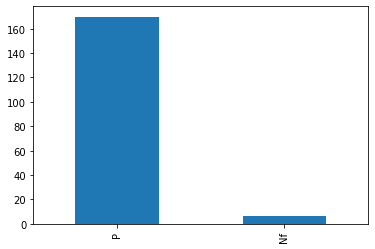

In [18]:
# 計算「把」每個詞類出現的次數，並畫成一個柱狀圖。
lemma_count["Part-of-Speech"].value_counts().plot(kind='bar')

In [21]:
# 4. 資料統計
# 依照年級和詞義分組，計算每個年級使用「把」不同詞義的頻率，並新增欄位為Count。
# 將更新後的dataframe存放在 `Count_df` 並印出來。
Count_df=ba_df[ba_df['Lemma']=='把'].groupby(['Grade', 'Gloss']).size().reset_index(name='Count')
Count_df

,Grade,Gloss,Count
0,三,引介導致狀態改變的目標。,8
1,三,引介認知評價的對象。,5
2,三,計算可以用手一把抓起的物品的單位。,2
3,三,計算有把手或是可以握在手中的物品的單位。,3
4,三,計算用手動作次數的單位，前接數詞，多半出現在動詞的後面。,1
5,五,引介導致狀態改變的目標。,16
6,五,引介處置的對象。,7
7,五,引介認知評價的對象。,6
8,五,計算可以用手一把抓起的物品的單位。,7
9,五,計算成束的長條狀物品的單位。,2


## 題目二 (50%)

這是一個來自Dcard的資料集，總共有六個直欄：

  * title: 標題
  * commentCount: 留言數
  * likeCount: 按讚數
  * forumName: 看板名稱
  * gender: 發文者性別
  * text: 內文，格式是list of list of list (以字串資料型態呈現)
    * 第一層是整篇文章
    * 第二層是句子
    * 第三層是 `[token, POS tag]`

In [39]:
# 1. 資料讀取
dcard_df=pd.read_csv('./dcard-500.csv', encoding='utf-8')
dcard_df.head(6)

,title,commentCount,likeCount,forumName,gender,text,date
0,想詢問一下,4,0,3C,0,"[[['Iphone', 'FW'], ['手機', 'Na'], ['line', 'FW...",2020-01-23
1,#新市 #羊肉爐 阿旦師羊肉爐,5,54,美食,1,"[[['各位', 'Nh'], ['晚安', 'VH'], ['我', 'Nh'], ['是...",2020-01-13
2,四面彿 靈驗,2,8,靈異,1,"[[['這陣子', 'Nd'], ['跟', 'P'], ['女友', 'Na'], ['分...",2020-01-22
3,Foodpanda到底是？,10,19,美食,0,"[[['訂', 'VC'], ['了', 'Di'], ['兩', 'Neu'], ['天'...",2020-01-29
4,#協尋匿名盜圖仔！ 當創作者塑膠？,9,50,手作,0,"[[['（', 'PARENTHESISCATEGORY'], ['❎', 'FW'], [...",2020-01-15
5,想請問關於東海哞哞屋的問題,20,18,美食,0,"[[['我們', 'Nh'], ['要', 'D'], ['去', 'VCL'], ['台中...",2020-01-12


In [41]:
# 2. 資料前處理
# 將text中的token（詞元）和POS tag（詞類標記）分開
dcard_df['tokens'] = dcard_df['text'].apply(lambda x: '|'.join([word[0] for word in x]))
dcard_df['pos'] = dcard_df['text'].apply(lambda x: '|'.join([word[1] for word in x]))

# 將gender欄位的數字轉換成文字
dcard_df['gender']=dcard_df['gender'].map({0:'F', 1:'M'})

# 刪掉text欄位
dcard_df.drop('text', axis=1, inplace=True)

# 用.head()將更新後的dataframe印出來
dcard_df.head()

IndexError: string index out of range

In [44]:
# 3. 資料觀察
# 印出每個看板的文章數量
print("每個看板的文章數量:")
print(dcard_df['forumName'].value_counts())

# 印出每個看板的留言數中位數
print("\n每個看板的留言數中位數:")
print(dcard_df.groupby('forumName')['commentCount'].median())

# 印出每個看板的按讚數中位數
print("\n每個看板的按讚數中位數:")
print(dcard_df.groupby('forumName')['likeCount'].median())

# 印出每個看板的發文者性別數量
print("\n每個看板的發文者性別數量:")
dcard_df.groupby(['forumName', 'gender'])['gender'].count().unstack(fill_value=0)

每個看板的文章數量:
美食    105
工作    103
靈異    102
手作     97
3C     93
Name: forumName, dtype: int64

每個看板的留言數中位數:
forumName
3C     6.0
工作     6.0
手作     5.0
美食    14.0
靈異     6.0
Name: commentCount, dtype: float64

每個看板的按讚數中位數:
forumName
3C      2.0
工作      6.0
手作     42.0
美食    125.0
靈異     16.0
Name: likeCount, dtype: float64

每個看板的發文者性別數量:


gender,0,1
forumName,,
3C,54,39
工作,69,34
手作,70,27
美食,69,36
靈異,54,48
